In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from pathlib import Path

In [2]:
# add csv file
data_salaries_cleaned_csv = Path("../Resources/data_salaries_cleaned.csv")

In [3]:
# read csv
data_salaries_cleaned = pd.read_csv(data_salaries_cleaned_csv)

In [4]:
# filter by job title
data_engineers = data_salaries_cleaned.loc[(data_salaries_cleaned["job_title"]=="Data Engineer")]
data_scientists = data_salaries_cleaned.loc[(data_salaries_cleaned["job_title"]=="Data Scientist")]
data_analysts = data_salaries_cleaned.loc[(data_salaries_cleaned["job_title"]=="Data Analyst")]
machine_learning_engineers = data_salaries_cleaned.loc[(data_salaries_cleaned["job_title"]=="Machine Learning Engineer")]
data_analysts.shape

(1026, 7)

In [5]:
# outliers for each job title
# data analysts:
quartiles = data_analysts["salary"].quantile([.25,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Values below 4150.0 could be outliers.
Values above 219750.0 could be outliers.


In [6]:
data_analysts = data_analysts.loc[(data_analysts["salary"]>lower_bound) & (data_analysts["salary"]<upper_bound)]

In [7]:
# outliers for each job title
# data scientists:
quartiles = data_scientists["salary"].quantile([.25,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Values below 35125.0 could be outliers.
Values above 290925.0 could be outliers.


In [8]:
data_scientists = data_scientists.loc[(data_scientists["salary"]>lower_bound) & 
                                      (data_scientists["salary"]<upper_bound)]

In [9]:
# outliers for each job title
# data engineers:
quartiles = data_engineers["salary"].quantile([.25,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Values below 19850.0 could be outliers.
Values above 284250.0 could be outliers.


In [10]:
data_engineers = data_engineers.loc[(data_engineers["salary"]>lower_bound) & (data_engineers["salary"]<upper_bound)]

In [11]:
# outliers for each job title
# machine learning engineers:
quartiles = machine_learning_engineers["salary"].quantile([.25,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Values below 33750.0 could be outliers.
Values above 339750.0 could be outliers.


In [12]:
machine_learning_engineers = machine_learning_engineers.loc[(machine_learning_engineers["salary"]>lower_bound) & 
                                                            (machine_learning_engineers["salary"]<upper_bound)]

In [13]:
# get average for each experience level in each job title
data_engineer_salaries = data_engineers.groupby(["experience_level"])["salary"].mean()
data_scientist_salaries = data_scientists.groupby(["experience_level"])["salary"].mean()
data_analyst_salaries = data_analysts.groupby(["experience_level"])["salary"].mean()
machine_learning_engineer_salaries = machine_learning_engineers.groupby(["experience_level"])["salary"].mean()

In [31]:
salaries_by_experience_level = pd.DataFrame({"Data Analyst": data_analyst_salaries,
                                            "Data Scientist": data_scientist_salaries,
                                            "Data Engineer": data_engineer_salaries,
                                            "ML Engineer": machine_learning_engineer_salaries})

salaries_by_experience_level = salaries_by_experience_level.reindex(["EN", "MI", "SE", "EX"])
salaries_by_experience_level

,Data Analyst,Data Scientist,Data Engineer,ML Engineer
experience_level,,,,
EN,75685.428571,106415.886364,109101.880597,139916.454545
MI,103622.379913,136249.036145,129740.720000,168484.183333
SE,119998.592330,167551.901840,156680.738880,194317.566558
EX,107000.000000,180481.818182,181023.461538,190950.000000


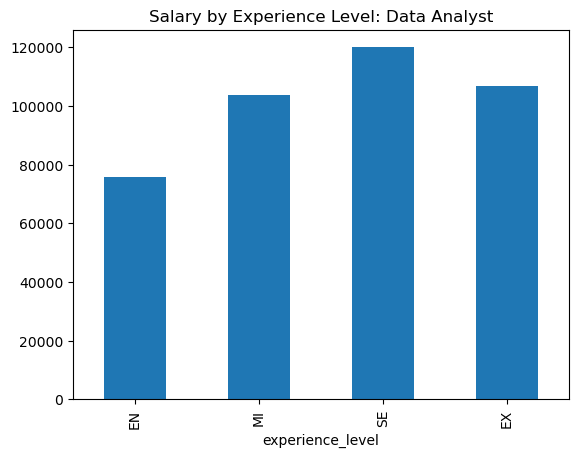

In [15]:
salaries_by_experience_level["Data Analyst"].plot(kind="bar", title="Salary by Experience Level: Data Analyst")
plt.show()

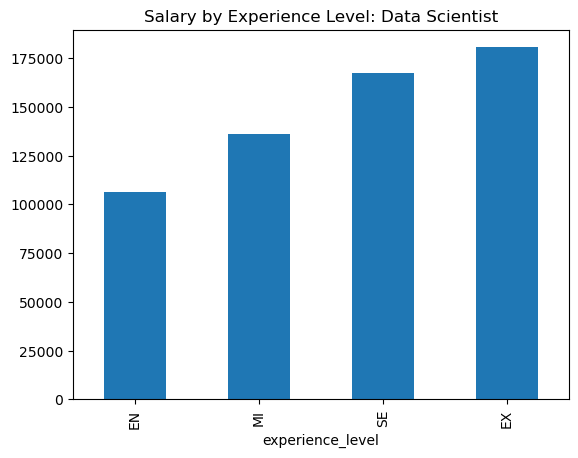

In [16]:
salaries_by_experience_level["Data Scientist"].plot(kind="bar", title="Salary by Experience Level: Data Scientist")
plt.show()

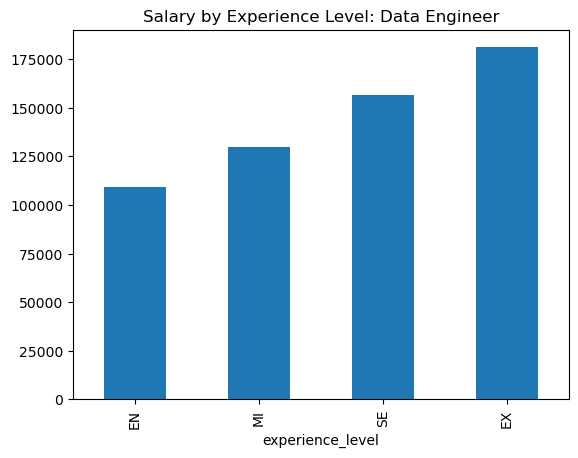

In [17]:
salaries_by_experience_level["Data Engineer"].plot(kind="bar", title="Salary by Experience Level: Data Engineer")
plt.show()

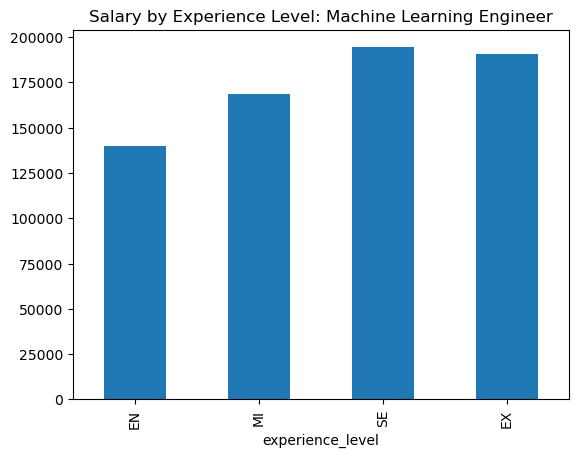

In [34]:
salaries_by_experience_level["ML Engineer"].plot(kind="bar", title="Salary by Experience Level: Machine Learning Engineer")
plt.show()

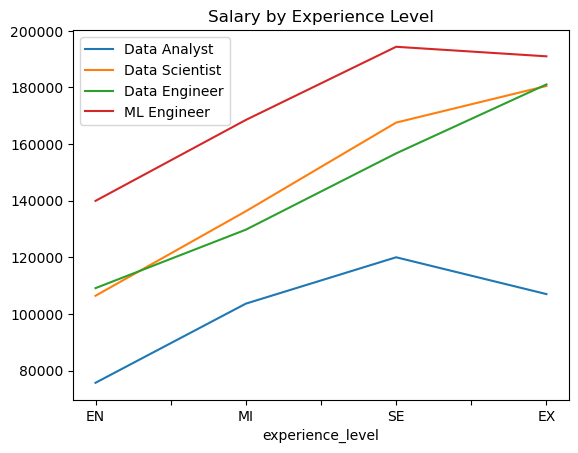

In [35]:
salaries_by_experience_level.plot(kind="line", title="Salary by Experience Level")
plt.show()

In [36]:
for col in salaries_by_experience_level.columns:
    name = f"{str(col)} Salary Increases"
    salaries_by_experience_level[name] = salaries_by_experience_level[col].diff()

In [37]:
salaries_by_experience_level

,Data Analyst,Data Scientist,Data Engineer,ML Engineer,Data Analyst Salary Increases,Data Scientist Salary Increases,Data Engineer Salary Increases,ML Engineer Salary Increases
experience_level,,,,,,,,
EN,75685.428571,106415.886364,109101.880597,139916.454545,NaN,NaN,NaN,NaN
MI,103622.379913,136249.036145,129740.720000,168484.183333,27936.951341,29833.149781,20638.839403,28567.728788
SE,119998.592330,167551.901840,156680.738880,194317.566558,16376.212417,31302.865696,26940.018880,25833.383225
EX,107000.000000,180481.818182,181023.461538,190950.000000,-12998.592330,12929.916341,24342.722659,-3367.566558


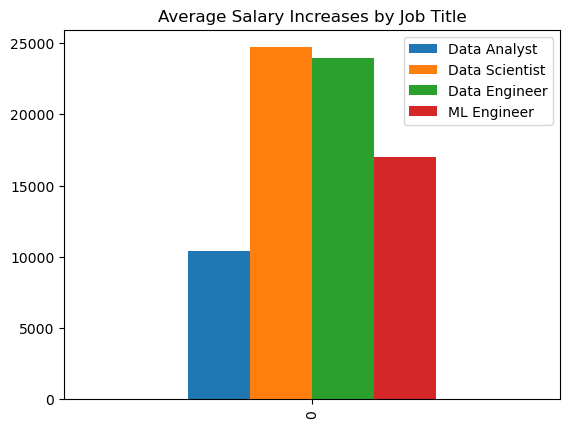

In [39]:
average_salary_increase_DA = salaries_by_experience_level["Data Analyst Salary Increases"].mean()
average_salary_increase_DS = salaries_by_experience_level["Data Scientist Salary Increases"].mean()
average_salary_increase_DE = salaries_by_experience_level["Data Engineer Salary Increases"].mean()
average_salary_increase_MLE = salaries_by_experience_level["ML Engineer Salary Increases"].mean()

average_salary_increases = pd.DataFrame({"Data Analyst": [average_salary_increase_DA],
                                        "Data Scientist": [average_salary_increase_DS],
                                        "Data Engineer": [average_salary_increase_DE],
                                        "ML Engineer": [average_salary_increase_MLE]})
average_salary_increases.plot(kind="bar", title="Average Salary Increases by Job Title")
plt.show()

In [40]:
average_salary_increase_DA = round(salaries_by_experience_level["Data Analyst Salary Increases"].mean(),2)
average_salary_increase_DS = round(salaries_by_experience_level["Data Scientist Salary Increases"].mean(),2)
average_salary_increase_DE = round(salaries_by_experience_level["Data Engineer Salary Increases"].mean(),2)
average_salary_increase_MLE = round(salaries_by_experience_level["ML Engineer Salary Increases"].mean(),2)

print(f"${average_salary_increase_DA}")
print(f"${average_salary_increase_DS}")
print(f"${average_salary_increase_DE}")
print(f"${average_salary_increase_MLE}")

$10438.19
$24688.64
$23973.86
$17011.18
